# Task-2
 

# To Explore Supervised Machine Learning Algorithm

# Simple Linear Regression

Objective-To predict the score if the students study for 9.25 hours in a day.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
%matplotlib inline

In [2]:
path="http://bit.ly/w-data"
dataset=pd.read_csv(path)
print("dataset")
dataset.head(10)

dataset


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
dataset.shape


(25, 2)

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Correlation

In [5]:
#Analysing the correlation between variables
correlation=dataset.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


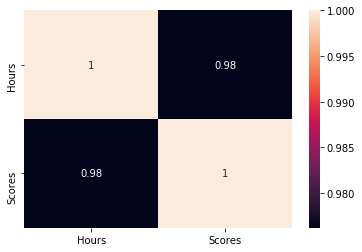

In [6]:
sns.heatmap(dataset.corr(),annot=True)

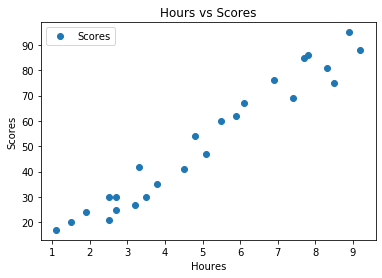

In [7]:
#Plotting the distribution of score
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores')
plt.xlabel('Houres')
plt.ylabel('Scores')
plt.show()

From above plot we see that there is a positive relation between hours and percentage score.

# Preparing the data

In [8]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values

# Train Test split


In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the algorithm

In [10]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(regressor.intercept_)

2.018160041434683


In [12]:
print(regressor.coef_)

[9.91065648]


# Making Prediction

In [13]:
y_pred=regressor.predict(x_test)

In [14]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


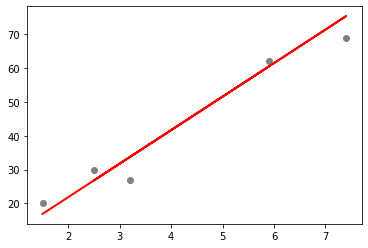

In [15]:
plt.scatter(x_test,y_test,color='gray')
plt.plot(x_test,y_pred,color='red',linewidth=2)
plt.show()

The straight line in above graph shows our algorithm is correct.

# Predicting the score if a student study 9.25 hours in a day

In [16]:
Hours=9.25
pred=regressor.predict([[Hours]])
print("Number of hours=",format(Hours))
print("Predicted Score=",format(pred[0]))

Number of hours= 9.25
Predicted Score= 93.69173248737538


# Evaluate the Algorithm

In [17]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


The value of root mean squared error is less than 10% of the mean value of the percentages of all students.